<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 3: Machine Learning - Regresión Logística</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de Regresión Logística para la construcción de un modelo de clasificación.

___

## Bibliografía Básica
- Machine Learning. Tom Mitchell. MacGraw-Hill, 1997

___

Implementar un modelo de regresión logística para predecir las personas que formarán parte de nuestra empresa. Ponte en el papel de Director del departamento de recursos humanos, y quieres determinar que solicitudes de admisión puedes admitir en base al resultado de dos exámenes.

Dispones de datos históricos de anteriores convocatorias ($ex2data1.txt$) que se pueden utilizar como conjunto de entrenamiento para la regresión logística. Cada ejemplo revela la puntuación de cada examen y la decisión de ingreso.

Utilizar este jupyter notebook para ir incorporando el código y las llamadas a las funciones que se piden en los siguientes ejercicios.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math
import matplotlib.pyplot as plt

## Ejercicios
#### EJ01. 
Al igual que en la pasada EPD, antes de empezar la tarea visualizar el conjunto de datos. Añadir el código necesario para cargar los datos, e implementar la función $plotData.py$ para representar los datos gráficamente. La siguiente imagen muestra un ejemplo del resultado de la visualización.

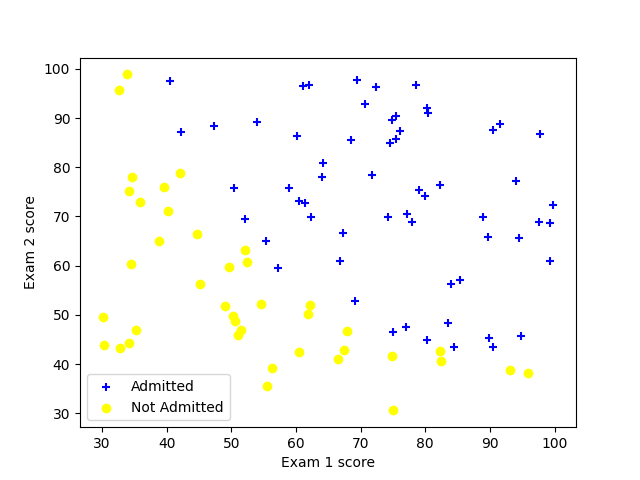

##### Solución:

In [2]:
file = pd.read_csv("ex2data1.txt", names=["score1", "score2", "label"])

In [3]:
X = pd.DataFrame({'score1': file['score1'],'score2': file['score2']})
y = pd.DataFrame({'label': file['label']})

In [4]:
# función plotData
def plotData(data):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Plot the positive and negative examples on a
    #               2D plot, using the option 'k+' for the positive
    #               examples and 'ko' for the negative examples.
    # Find Indices of Positive and Negative Examples
    admitido = data[data['label'] == 1]
    no_admitido = data[data['label'] == 0]

    # Crear un gráfico de dispersión con colores según los valores de y
    plt.scatter(admitido['score1'], admitido['score2'], color='blue', marker='+', label='Admitido')
    plt.scatter(no_admitido['score1'], no_admitido['score2'], color='yellow', marker='.', label='No Admitido')

    # Añadir etiquetas y título
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    # Añadir una leyenda
    plt.legend()

    # Mostrar el gráfico de dispersión
    plt.show()

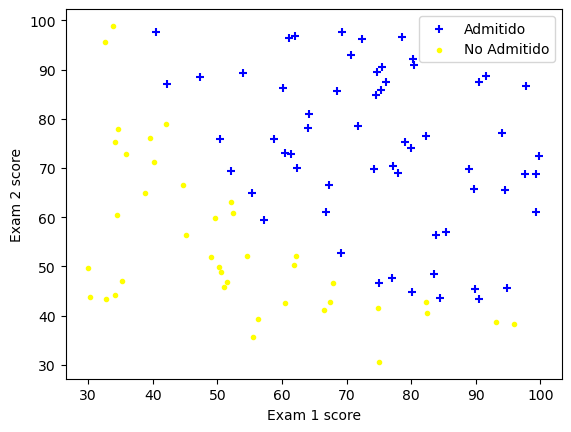

In [5]:
plotData(file)

#### EJ02.
Antes de comenzar con la función de coste, recuerda que la hipótesis de la regresión logística está definida por $ℎ𝜃(𝑥)=𝑔(𝜃^𝑇𝑥)$, siendo $g$ la función sigmoide definida como $𝑔(𝑧)=\dfrac{1}{1+𝑒^{−𝑧}}$. Implementa esta función en $sigmoid(z)$ de manera que se pueda llamar desde este notebook. Al evaluar esta función con el valor 0 el resultado debe ser exactamente 0.5, y que para un valor alto positivo será 1 y para un valor alto negativo será 0.

##### Solución:

In [6]:
def sigmoid(z):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar)
    return 1 / (1 + np.exp(-z))

In [7]:
z=0
print("comprobacion de la funcion sigmoide para z=",z)
print(sigmoid(z))
z=100
print("comprobacion de la funcion sigmoide para z=",z)
print(sigmoid(z))
z=-100
print("comprobacion de la funcion sigmoide para z=",z)
print(sigmoid(z))

comprobacion de la funcion sigmoide para z= 0
0.5
comprobacion de la funcion sigmoide para z= 100
1.0
comprobacion de la funcion sigmoide para z= -100
3.7200759760208356e-44


#### EJ03.
Implementa una función que devuelva el coste. Con los parámetros $theta$ inicializados a 0, la función devolverá un coste de 0.693. Además, implementa la función del gradiente. 

Nota: Recuerde que debe usar la forma vectorizada para que la implementación sea eficiente.

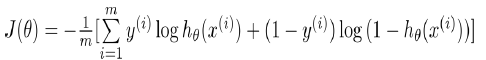

##### Solución:

In [8]:
def costFunction(theta, X, y):
    # Initialize some useful values
    # You need to return the following variables correctly
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    return (-(1 / len(y)) * np.sum(np.multiply(y, np.log(sigmoid(np.dot(X,theta)))) + np.multiply(1-y, np.log(1 - sigmoid(np.dot(X, theta))))))

In [9]:
def gradientFunction(theta, X, y):
    # Initialize some useful values
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    return (1/len(y)) * (np.dot(X.T, (sigmoid(np.dot(X, theta))-y)))

In [10]:
m,n = X.shape
# Add intercept term to x and X_test
ones = np.ones((len(X), 1))
X.insert(0, 'unos', ones)
# Initialize fitting parameters
theta = np.zeros((n+1, 1))
display(X.head())

,unos,score1,score2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [11]:
# Compute and display initial cost and gradient
cost = costFunction(theta,X,y)
print("El coste para theta inicial es: ", cost)
print("\nGradiente inicial es: ", gradientFunction(theta, X, y))

El coste para theta inicial es:  label    0.693147
dtype: float64

Gradiente inicial es:  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#### EJ04.
Python dispone de una función de optimización en la librería scipy que se puede utilizar para encontrar el mínimo de la función de coste con los parámetros $theta$. Usaremos la función $fmin_cg$ (que usa como optimizador el gradiente conjugado). En el programa principal puedes ver escrito el código de la llamada a la función con los siguientes parámetros: la función de coste que devuelve el coste, los valores iniciales de $theta$, la función del descenso del gradiente y los argumentos de las funciones. 

Modifique el código necesario para poder utilizar la función de optimización. 

El coste resultante debe ser 0,203. Los theta óptimos encontrados deben ser: [-25.17594986 0.20634863 0.20158987]. 

Representa la frontera de decisión como aparece en la figura.

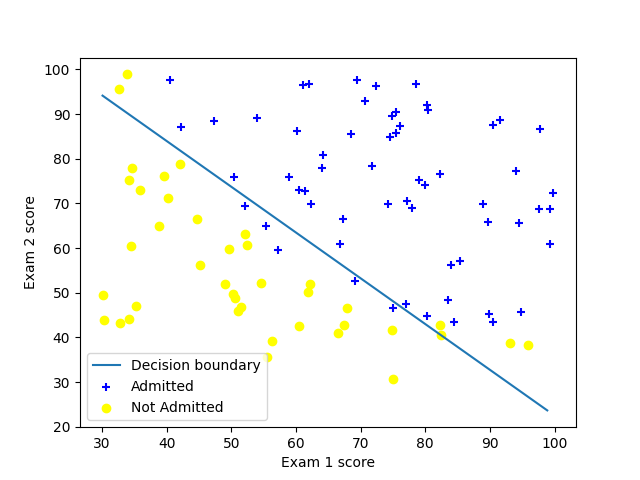

##### Solución:

In [12]:
theta = np.zeros((n+1,1))
 
parametros_fmin = op.fmin_cg(maxiter = 200, f=costFunction, x0=theta.flatten(), fprime=gradientFunction, args=(X, y.to_numpy().flatten()))
print("Thetas encontrado por el fmin_cg: ", parametros_fmin)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 49
         Function evaluations: 112
         Gradient evaluations: 112
Thetas encontrado por el fmin_cg:  [-25.15623755   0.20619095   0.20143037]


C:\Users\danit\AppData\Local\Temp\ipykernel_5912\4080794529.py:7: RuntimeWarning: divide by zero encountered in log
  return (-(1 / len(y)) * np.sum(np.multiply(y, np.log(sigmoid(np.dot(X,theta)))) + np.multiply(1-y, np.log(1 - sigmoid(np.dot(X, theta))))))
C:\Users\danit\AppData\Local\Temp\ipykernel_5912\4080794529.py:7: RuntimeWarning: invalid value encountered in multiply
  return (-(1 / len(y)) * np.sum(np.multiply(y, np.log(sigmoid(np.dot(X,theta)))) + np.multiply(1-y, np.log(1 - sigmoid(np.dot(X, theta))))))
C:\Users\danit\AppData\Local\Temp\ipykernel_5912\4080794529.py:7: RuntimeWarning: divide by zero encountered in log
  return (-(1 / len(y)) * np.sum(np.multiply(y, np.log(sigmoid(np.dot(X,theta)))) + np.multiply(1-y, np.log(1 - sigmoid(np.dot(X, theta))))))
C:\Users\danit\AppData\Local\Temp\ipykernel_5912\4080794529.py:7: RuntimeWarning: invalid value encountered in multiply
  return (-(1 / len(y)) * np.sum(np.multiply(y, np.log(sigmoid(np.dot(X,theta)))) + np.multiply(1-y, n

In [18]:
def plotDecisionBoundary(data, theta, X, y):
    admitido = data[data['label'] == 1]
    no_admitido = data[data['label'] == 0]

    # Crear un gráfico de dispersión con colores según los valores de y
    plt.scatter(admitido['score1'], admitido['score2'], color='blue', marker='+', label='Admitido')
    plt.scatter(no_admitido['score1'], no_admitido['score2'], color='yellow', marker='.', label='No Admitido')

    # Añadir etiquetas y título
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    valoresX = [min(X['score1']), max(X['score1'])]
    valoresY = - (theta[0] + theta[1] * np.array(valoresX)) / theta[2]
    plt.plot(valoresX, valoresY, label = "Frontera de decision")
    # Añadir una leyenda
    plt.legend()

    # Mostrar el gráfico de dispersión
    plt.show()

C:\Users\danit\AppData\Local\Temp\ipykernel_5912\892104781.py:13: RuntimeWarning: invalid value encountered in divide
  valoresY = - (theta[0] + theta[1] * np.array(valoresX)) / theta[2]


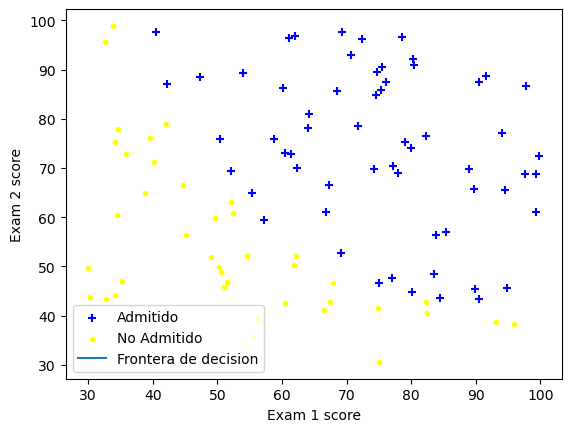

In [20]:
# Plot Boundary
plotDecisionBoundary(file, theta, X, y)

#### EJ05.
Una vez obtenidos los parámetros, puedes utilizar el modelo para predecir si un candidato en particular será admitido o no.
Prueba en el programa principal que un candidato con una puntuación de 45 y 85 en cada examen tiene una probabilidad del 0,776 de ser admitido.

##### Solución:

In [21]:
# threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
def predict(theta, X_train, bool_round):
    m = X_train.shape[0]
    p = np.zeros((m, 1))
    if bool_round:
        p = np.round(sigmoid(np.dot(X_train, theta)))        
    else:
        p = sigmoid(np.dot(X_train, theta))    
    return p

In [22]:
# After learning the parameters, you'll like to use it to predict the outcomes
    # on unseen data. In this part, you will use the logistic regression model
    # to predict the probability that a student with score 45 on exam 1 and
    # score 85 on exam 2 will be admitted.
    #
    # Your task is to complete the code in predict.py
    # Predict probability for a student with score 45 on exam 1
    # and score 85 on exam 2.
datosEstudiantes = np.array([1,45,85])
prediccionEstudiantes = predict(parametros_fmin, datosEstudiantes, bool_round=False)
print("Con fmin_cg, para estudiante con 45, 85 la prediccion es: ", prediccionEstudiantes)

Con fmin_cg, para estudiante con 45, 85 la prediccion es:  0.7762484704498326


#### EJ06.
Implementa la función p=predict(theta, X) de manera que con el modelo calculado theta, devuelva la predicción
de un conjunto de test que se le pase como parámetro. En este caso se utilizará el mismo conjunto de entrenamiento X. 

Mostrar la exactitud obtenida.

##### Solución:

In [23]:
# Compute accuracy on our training set using minimize:
predicciones = predict(parametros_fmin, X, bool_round=True)
accuracy = accuracy_score(y.to_numpy().flatten(), predicciones)
print(f'Precisión: {accuracy}')

Precisión: 0.89


## Problemas

#### PROBLEMA 01.
Repita los ejercicios EJ4, EJ5 y EJ6 usando la regresión logística de la librería sklearn.

##### Solución:

In [31]:
def optimizeTheta(X, y, initial_theta):
    
    X = np.array(X)
    #Poner y aplanada
    y = np.array(y).flatten()
    result = minimize(fun=costFunction, 
                      x0=initial_theta, 
                      args=(X, y), 
                      method='TNC', 
                      jac=gradientFunction)
    return result.x, result.fun

m, n = X.shape
initial_theta = np.zeros(n)

theta_opt, cost = optimizeTheta(X, y, initial_theta)
print(f"Coste encontrado: {cost}")
print(f"Theta óptimo: {theta_opt}")

Coste encontrado: 0.203497701589474
Theta óptimo: [-25.16131876   0.20623159   0.20147149]


#### PROBLEMA 02.
Implementa una regresión logística regularizada para predecir si los microchips de una fábrica pasan el control de calidad.
Dispones de un conjunto de datos (ex2data2.txt) que contiene un histórico con los resultados de dos test realizados
anteriormente a otras piezas, indicando si fueron aceptadas o no. Estos datos se utilizarán para obtener un modelo de regresión
logística usando regularización para evitar el problema de overfitting.
1. Cargar y visualizar los datos.
2. Como se puede comprobar en la gráfica, los puntos no son separables linealmente. Una solución es crear más atributos
mediante la función proporcionada en el fichero P2_mapFeature.py, que permitirá mapear los atributos en términos
polinomiales de x1 y x2 hasta la sexta potencia (x1, x2, x1
2, x2
2, x1*x2, x1*x2
2,…). De esta manera obtendremos una
matriz con 28 atributos, permitiendo obtener una frontera de decisión mucho más compleja que se pueda adaptar mejor a
los puntos. Revisar la función facilitada. Otra posible opción es utilizar PolynomialFeatures de sklearn, realiza una prueba.
3. Implementa de nuevo la función que calcula el coste y el gradiente pero esta vez con regularización.
4. Igual que en el EJ4, utiliza la optimización de la librería scipy para obtener los parámetros theta óptimos.
5. Revisar cómo se muestra la frontera de decisión entre los ejemplos positivos y negativos mediante la función que se
encuentra en el fichero P2_plotDecisionBoundary.py
6. Finalmente, predecir el mismo conjunto de entrenamiento y mostrar la exactitud obtenida. Después, probar con diferentes
valores de lambda de manera que, como ocurre en las gráficas que se muestran a continuación, se observe el overfitting
y la underfitting.

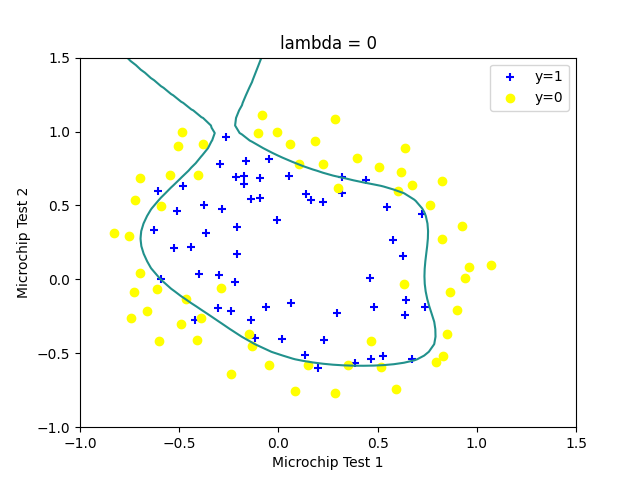 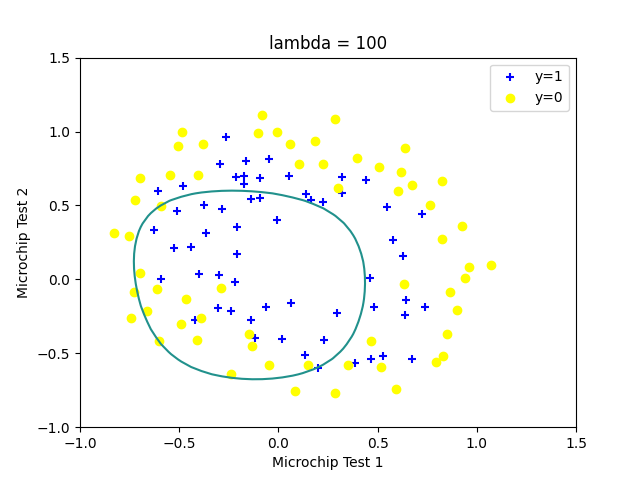


##### Solución: